# Creating a Dataset in Pytorch & Tensorflow from Disk

This example from S. Raschka book we are going to input for a model from a group of image files. They need to be resized and labelled.

In [1]:
import torch
import tensorflow as tf
import pathlib
from IPython.display import Image
import matplotlib.pyplot as plt
import os, sys
from PIL import Image
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
%matplotlib inline

In [2]:
images_dir = pathlib.Path('./cat_dog_images')
images_list = sorted([str(path) for path in images_dir.glob('*.jpg')])
print(images_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


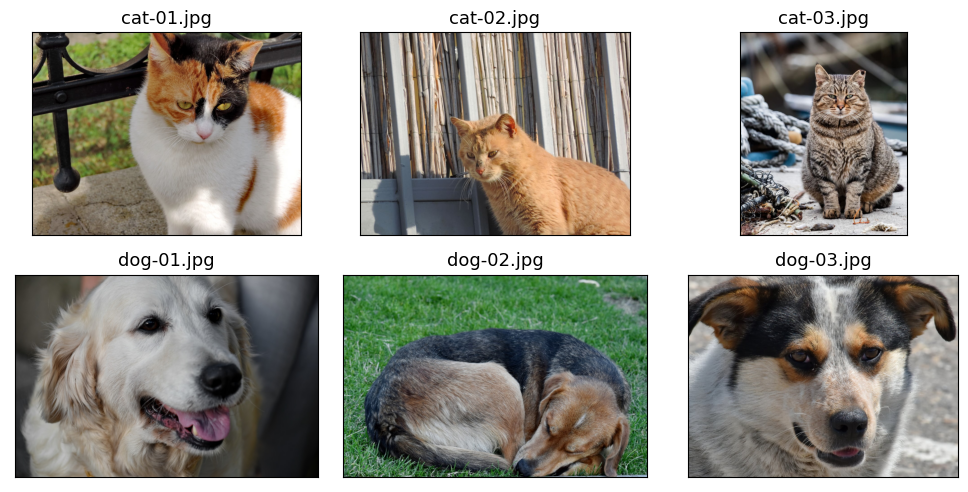

In [3]:
# Visualize Images

fig = plt.figure(figsize=(10,5))

for i,file in enumerate(images_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size = 13)

plt.tight_layout()
plt.show()

In [4]:
# Images need to be at the same size.
# Also the images need to be labelled, in this case 1 for dogs and 0 for cats

# Labelling

labels = [np.where('dog' in os.path.basename(file), 1, 0) for file in images_list]
print(labels)
print(type(labels))

[array(0), array(0), array(0), array(1), array(1), array(1)]
<class 'list'>


In [5]:
class ImageDataset(Dataset):
    '''
    A custom Dataset class must contain the following methods to be used in the dataloader
    __init__()
    __getitem__() to return the corresponding sample to the given index
    '''
    
    def __init__(self, files_list, labels_list):
        self.files_list = files_list
        self.labels_list = labels_list
        
    def __len__(self):
        return len(self.labels_list)
    
    def __getitem__(self, index):
        return self.files_list[index],self.labels_list[index]

In [6]:
image_dataset = ImageDataset(images_list,labels)

for file,label  in image_dataset:
    print(file, label)
    print(type(label))

cat_dog_images\cat-01.jpg 0
<class 'numpy.ndarray'>
cat_dog_images\cat-02.jpg 0
<class 'numpy.ndarray'>
cat_dog_images\cat-03.jpg 0
<class 'numpy.ndarray'>
cat_dog_images\dog-01.jpg 1
<class 'numpy.ndarray'>
cat_dog_images\dog-02.jpg 1
<class 'numpy.ndarray'>
cat_dog_images\dog-03.jpg 1
<class 'numpy.ndarray'>


Usually the images need additional transformations, resize, augmentation, rotations, scaling, decode raw content and convert the pixel arrays into tensors.

In Pytorch, such transformations can be accomplished with the torchvision module.

torchvision.transforms

https://pytorch.org/vision/stable/index.html

Transforms are common image transformations available in the torchvision.transforms module. They can be chained together using Compose. Most transform classes have a function equivalent: functional transforms give fine-grained control over the transformations. This is useful if you have to build a more complex transformation pipeline (e.g. in the case of segmentation tasks).

In [7]:
import torchvision.transforms as transforms

im_height, im_width = 120, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((im_height, im_width))
])

# Update the ImageDataset to include the transform defined into the Pipeline


In [8]:
class ImageDataset(Dataset):
    '''
    A custom Dataset class must contain the following methods to be used in the dataloader
    __init__()
    __getitem__() to return the corresponding sample to the given index
    '''
    
    def __init__(self, files_list, labels_list, transform = None):
        self.files_list = files_list
        self.labels_list = labels_list
        self.transform = transform
        
    def __len__(self):
        return len(self.labels_list)
    
    def __getitem__(self, index):
        img = Image.open(self.files_list[index])
        if self.transform is not None:
            # Apply transforms
            img = self.transform(img)
        label = self.labels_list[index]
        return img, label

In [9]:
image_dataset = ImageDataset(images_list, labels, transform)

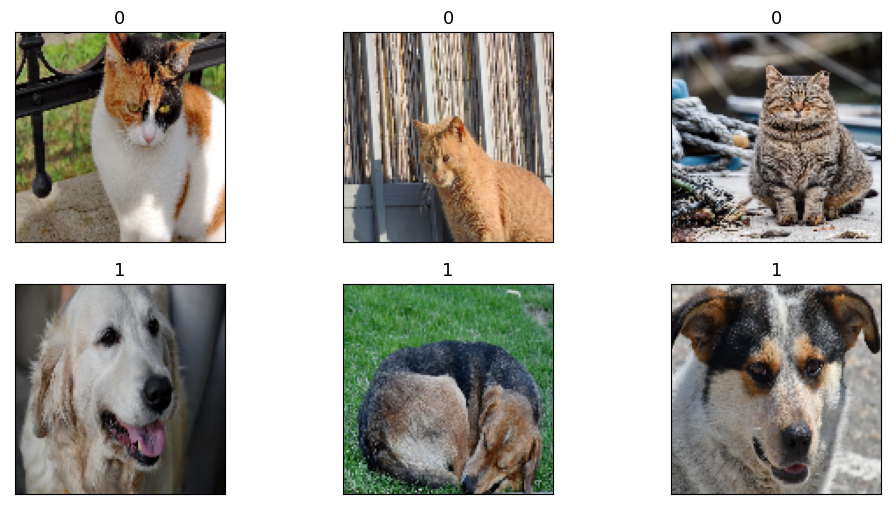

In [11]:
# Visualize the transformed images

fig = plt.figure(figsize = (12,6))

for i, sample in enumerate(image_dataset):
    ax = fig.add_subplot(2,3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(sample[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{sample[1]}', size= 13)
    

In [12]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
